***PORTFOLIO ANALYSIS FOR SELECTED ASSETS***

In [5]:
# Install required libraries if not already installed
!pip install yfinance pandas numpy matplotlib seaborn scipy PyPortfolioOpt

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 220.1/220.1 kB 12.7 MB/s eta 0:00:00


In [6]:
# Dowmloding the required libraries and classes
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from pypfopt import EfficientFrontier, risk_models, expected_returns, plotting
import statsmodels.api as sm

In [7]:
# Data Downloding and making dataframe from yahoo finanace and getting CSV file
tickers = ['AAPL', 'MSFT', 'TSLA', 'AMZN', 'GOOG', 'NVDA', 'JNJ', 'BND', 'GLD', 'BTC-USD']
data = yf.download(tickers, start='2021-06-26', end='2024-06-26',auto_adjust=False)['Adj Close']
data.to_csv("closing_prices.csv")
data.head()

[*********************100%***********************]  10 of 10 completed


Ticker,AAPL,AMZN,BND,BTC-USD,GLD,GOOG,JNJ,MSFT,NVDA,TSLA
Date,,,,,,,,,,
2021-06-26,NaN,NaN,NaN,32186.277344,NaN,NaN,NaN,NaN,NaN,NaN
2021-06-27,NaN,NaN,NaN,34649.644531,NaN,NaN,NaN,NaN,NaN,NaN
2021-06-28,131.898239,172.194504,76.010910,34434.335938,166.580002,126.070114,146.061752,259.949646,19.942636,229.573334
2021-06-29,133.415115,172.406998,76.046356,35867.777344,164.830002,125.273857,146.070618,262.542145,19.984303,226.919998
2021-06-30,134.031647,172.007996,76.099525,35040.835938,165.630005,124.575500,146.702927,262.058472,19.960102,226.566666


In [8]:
#Drop rows with any NaNs (like weekends or missing stocks)
data = data.dropna()

In [9]:
# Declaration of Return
returns = data.pct_change().dropna()

In [10]:
# Descriptive Statistical analysis
desc_stats = returns.describe().T
print(desc_stats)

         count      mean       std       min       25%       50%       75%  \
Ticker                                                                       
AAPL     752.0  0.000754  0.017221 -0.058679 -0.008426  0.000753  0.009921   
AMZN     752.0  0.000383  0.023605 -0.140494 -0.012540  0.000189  0.012923   
BND      752.0 -0.000102  0.004307 -0.016153 -0.002820 -0.000047  0.002646   
BTC-USD  752.0  0.001438  0.036283 -0.226807 -0.017267  0.000251  0.018913   
GLD      752.0  0.000376  0.008842 -0.035683 -0.004769  0.000427  0.005495   
GOOG     752.0  0.000710  0.020089 -0.096350 -0.010261  0.001532  0.011090   
JNJ      752.0  0.000019  0.010136 -0.039833 -0.005468  0.000000  0.005682   
MSFT     752.0  0.000872  0.017293 -0.077156 -0.008094  0.000549  0.010882   
NVDA     752.0  0.003031  0.034265 -0.100046 -0.017419  0.002990  0.021755   
TSLA     752.0  0.000386  0.036241 -0.122422 -0.019600  0.001246  0.018912   

              max  
Ticker             
AAPL     0.088975  
AMZ

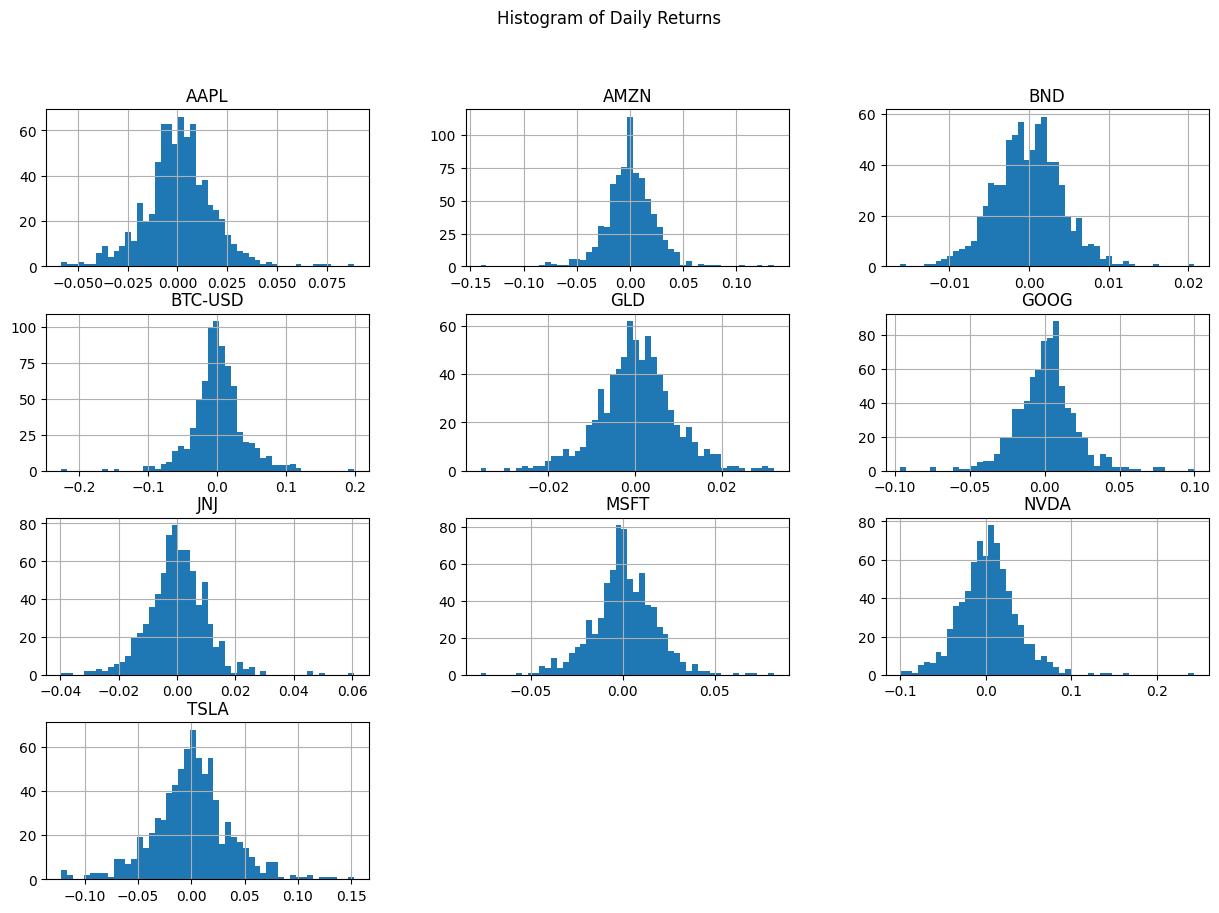

In [11]:
#Data Visualization through Histogram for returns
returns.hist(bins=50, figsize=(15, 10))
plt.suptitle("Histogram of Daily Returns")
plt.show()


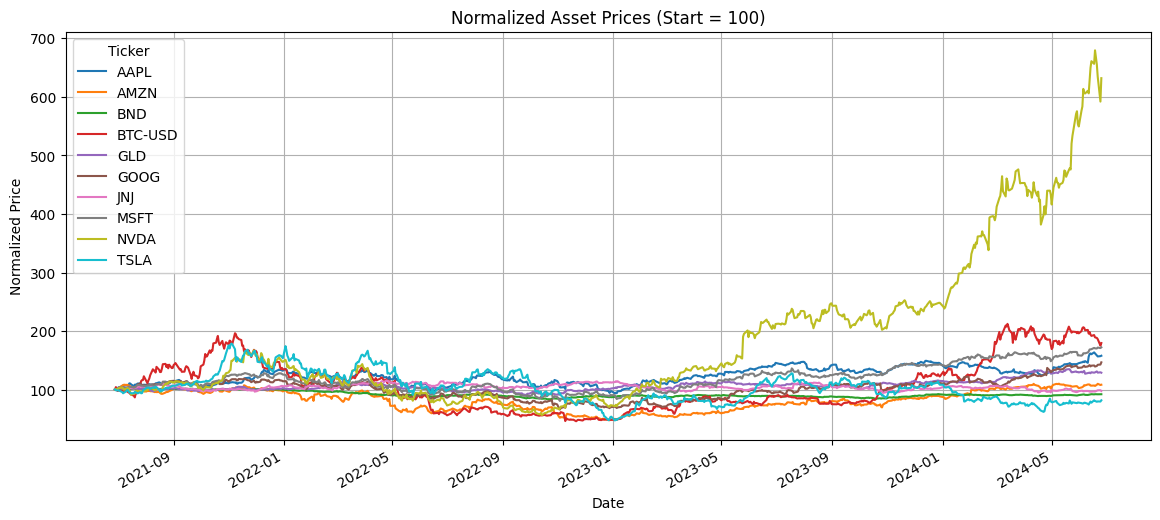

In [12]:
# Normalized Comparison of Asset Price Performance Over Time
normalized = data / data.iloc[0] * 100
normalized.plot(figsize=(14,6), title="Normalized Asset Prices (Start = 100)")
plt.ylabel("Normalized Price")
plt.grid(True)
plt.show()


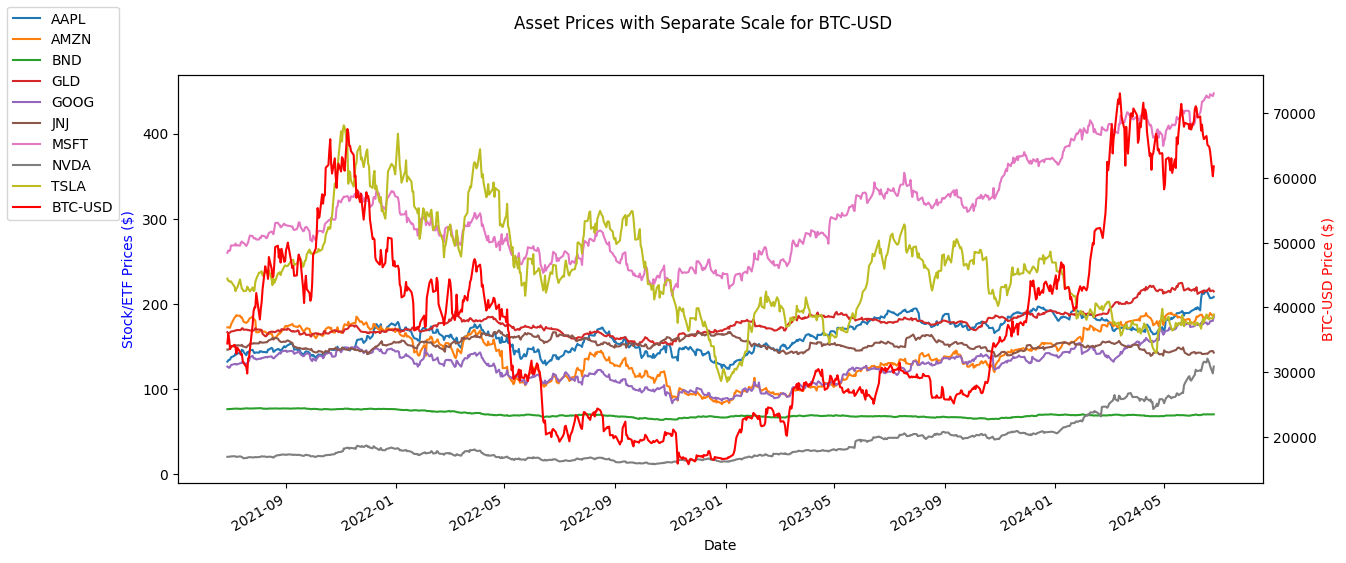

In [13]:
# Dual-Axis Plot of Asset Prices with Separate Scale for BTC-USD
fig, ax1 = plt.subplots(figsize=(14,6))

# Plot non-BTC assets
non_btc = data.drop(columns='BTC-USD')
non_btc.plot(ax=ax1, legend=False)
ax1.set_ylabel("Stock/ETF Prices ($)", color='blue')

# Plot BTC on secondary y-axis
ax2 = ax1.twinx()
data['BTC-USD'].plot(ax=ax2, color='red', label='BTC-USD')
ax2.set_ylabel("BTC-USD Price ($)", color='red')

fig.suptitle("Asset Prices with Separate Scale for BTC-USD")
fig.legend(loc='upper left')
plt.show()


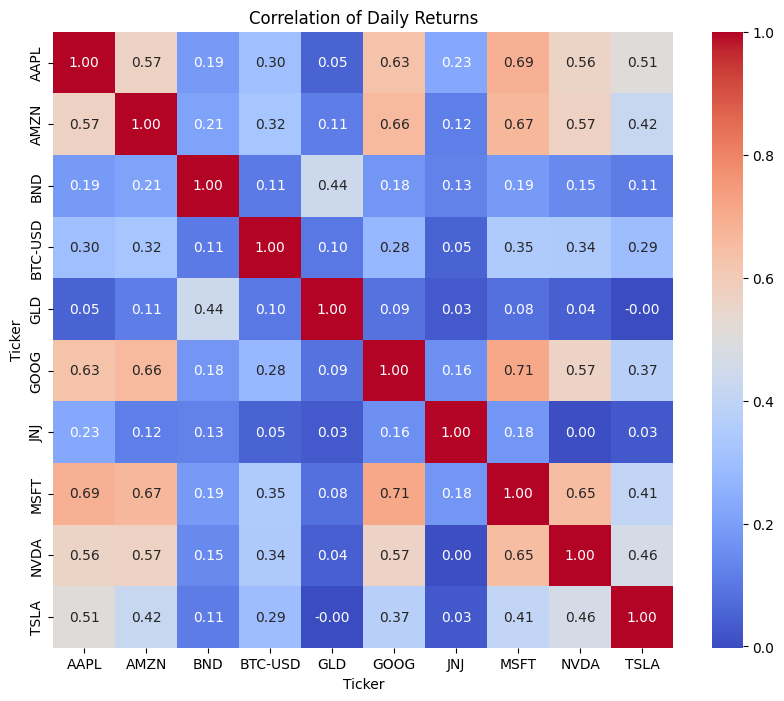

In [14]:
# Correlation analysis
plt.figure(figsize=(10,8))
sns.heatmap(returns.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation of Daily Returns")
plt.show()


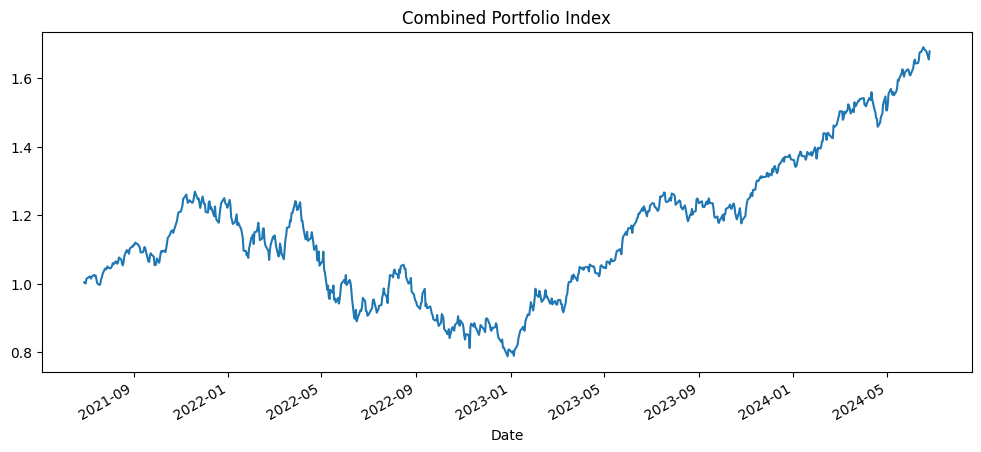

In [15]:
# Simulated Growth of an Equally Weighted Investment Portfolio on Combined Portfolio Index
weights = np.array([0.1]*10)  # equal weights or define custom
combined_returns = returns.dot(weights)
combined_prices = (1 + combined_returns).cumprod()
combined_prices.plot(figsize=(12,5), title="Combined Portfolio Index")
plt.show()


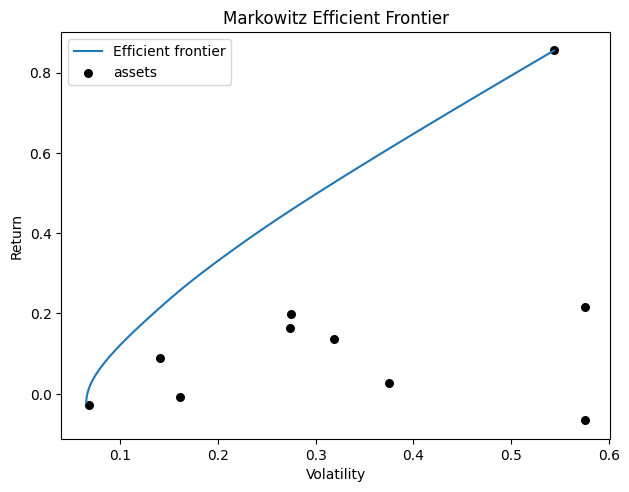

In [16]:
# Markowitz Efficient Frontier Analysis and Visuals
mu = expected_returns.mean_historical_return(data)
S = risk_models.sample_cov(data)

ef = EfficientFrontier(mu, S)
fig, ax = plt.subplots()
plotting.plot_efficient_frontier(ef, ax=ax, show_assets=True)
plt.title("Markowitz Efficient Frontier")
plt.show()


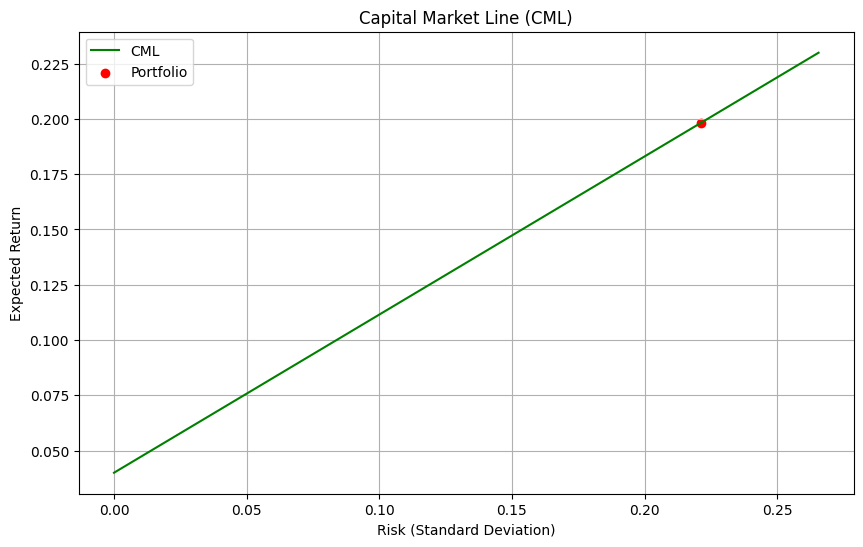

In [17]:
# Capital Market Line Analysis and Visuals and Annualized return & risk of combined portfolio

risk_free_rate = 0.04
portfolio_return = combined_returns.mean() * 252
portfolio_volatility = combined_returns.std() * (252 ** 0.5)
sharpe_ratio = (portfolio_return - risk_free_rate) / portfolio_volatility

import numpy as np
import matplotlib.pyplot as plt

# CML line
x = np.linspace(0, portfolio_volatility * 1.2, 100)
y = risk_free_rate + sharpe_ratio * x

# Plot
plt.figure(figsize=(10,6))
plt.plot(x, y, label="CML", color='green')
plt.scatter(portfolio_volatility, portfolio_return, color='red', label="Portfolio")
plt.title("Capital Market Line (CML)")
plt.xlabel("Risk (Standard Deviation)")
plt.ylabel("Expected Return")
plt.legend()
plt.grid(True)
plt.show()


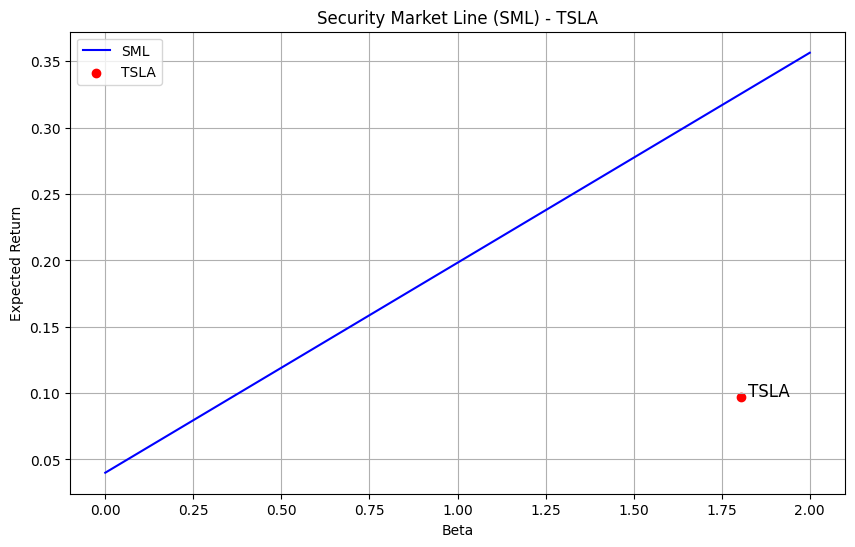

In [18]:
# Security Market Line Analysis and Visuals for TSLA

# Market = your combined portfolio returns
market = combined_returns
asset = returns['TSLA']  # the asset we compare

# Linear regression: TSLA ~ market
X = sm.add_constant(market)
y = asset
model = sm.OLS(y, X).fit()

beta_tsla = model.params[0]
alpha_tsla = model.params['const']

# CAPM Expected return of TSLA
market_return = market.mean() * 252
expected_tsla_return = risk_free_rate + beta_tsla * (market_return - risk_free_rate)
actual_tsla_return = y.mean() * 252

# SML line
betas = np.linspace(0, 2, 100)
sml_line = risk_free_rate + (market_return - risk_free_rate) * betas

# Plot SML
plt.figure(figsize=(10,6))
plt.plot(betas, sml_line, label='SML', color='blue')
plt.scatter(beta_tsla, actual_tsla_return, color='red', label='TSLA')
plt.text(beta_tsla + 0.02, actual_tsla_return, 'TSLA', fontsize=12)
plt.xlabel("Beta")
plt.ylabel("Expected Return")
plt.title("Security Market Line (SML) - TSLA")
plt.legend()
plt.grid(True)
plt.show()




In [19]:
# Annualized Return and Annualized Volatility Estimation
combined_return = combined_returns.mean() * 252
combined_volatility = combined_returns.std() * np.sqrt(252)

print(f"Annualized Return: {combined_return:.2%}")
print(f"Annualized Volatility (Risk): {combined_volatility:.2%}")


Annualized Return: 19.82%
Annualized Volatility (Risk): 22.13%
